# Extending a cytosim simulation
Requires Python>=3.7  
Before running, copy or move the cytosim module (cytosim.---.so) to the current folder.

Here we showcase by adding motors to an existing fiber simulation.

In [1]:
import cytosim
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# just a code to plot the simulation
def plot_sim(sim):
    space = sim.spaces[0]
    plt.figure()
    r = np.linspace(0,2.0*np.pi,100)
    plt.plot(5.0* np.cos(r),5.0*np.sin(r),color="black")
    for fiber in sim.fibers:
        p = fiber.points()
        plt.plot(p[:,0],p[:,1],color="green")
        plt.scatter(p[0,0],p[0,1],color="green")
    pos2 = np.array([c.position() for c in sim.couples if c.state()==3])
    pos1 = np.array([c.position() for c in sim.couples if c.state()==1 or c.state()==2])
    if pos2.size>0:
        plt.scatter(pos2[:,0],pos2[:,1],color="red")
    if pos1.size>0:
        plt.scatter(pos1[:,0],pos1[:,1],color="magenta")
    plt.axis('equal')
    plt.show()

## Fiber simulation
Here we simulate and a fiber. The point corresponds to the minus end.

In [3]:
sim = cytosim.start("cym/fiber.cym")

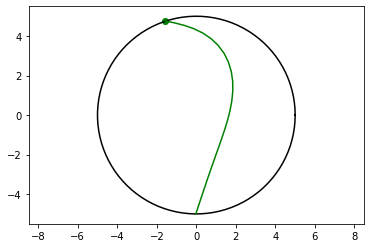

In [4]:
sim.run(10)
plot_sim(sim)

### Adding already defined objects

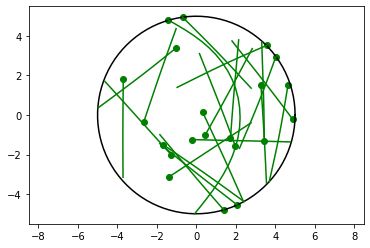

In [5]:
sim.add("filament","length = 5",20)
sim.run(20)
plot_sim(sim)

### Defining new objects
We can add new objects to the simulation, by first defining them (simul.set) and then adding them (simul.add)

In [6]:
kin_props = "binding_rate=10; binding_range=0.1; \
    unbinding_rate = 0.3 ; unbinding_force = 5 ; \
    activity=move; unloaded_speed = 1.0 ; stall_force = 5 ;hold_growing_end=1 ; "
s = sim.set("hand","kinesin",kin_props)

In [7]:
mot_props = "hand1=kinesin ; hand2=kinesin ; stiffness=100 ; diffusion=100 ; length = 0.05"
sim.set("couple","motor",mot_props)

{'diffusion': [100], 'hand1': [kinesin], 'hand2': [kinesin], 'length': [0.05], 'stiffness': [100]}

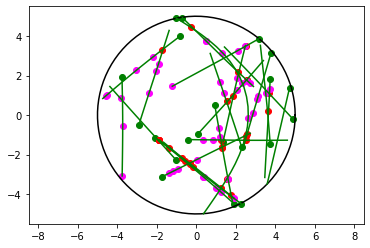

In [8]:
a =sim.add("motor","",100)
sim.run(100)
plot_sim(sim)

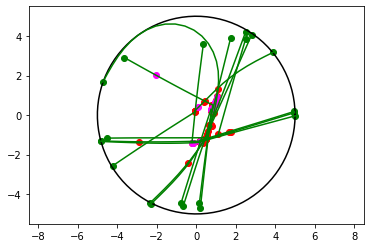

In [9]:
sim.prop.time_step = 0.01
sim.prop.complete(sim)
sim.run(500)
plot_sim(sim)